<a href="https://colab.research.google.com/github/sandroormeno/Workshop-Classification_TF_2.X/blob/master/Lecture_04a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd "/content/drive/My Drive/Colab Notebooks/workshop_tensorFlow"

/content/drive/My Drive/Colab Notebooks/workshop_tensorFlow


In [3]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [4]:
from PIL import Image
import numpy as np
import os
from random import shuffle
from keras.preprocessing import image
import matplotlib.pyplot as plt
import progressbar
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.python.keras import applications 

Using TensorFlow backend.


In [0]:
TRAIN_DIR = './train/'
TEST_DIR = './test/'

In [6]:
count = 0
for folders in os.listdir(TRAIN_DIR):
  path = os.path.join(TRAIN_DIR, folders)
  # print(path)
  for files in os.listdir(path):
    count += 1
    # print(files)
print(count)

724


In [0]:
def label_img(name):
    word_label = name.split('-')[0]
    if word_label == 'causa_rellena': return np.array([1, 0, 0])
    elif word_label == 'ceviche' : return np.array([0, 1, 0])
    elif word_label == 'pollo_a_la_brasa' : return np.array([0, 0, 1])

In [0]:
IMG_SIZE = 224

In [0]:
def load_data(dir, total):
  progressbar.streams.flush()
  bar = progressbar.ProgressBar(max_value=total)
  train_data = []
  c = 0
  for folders in os.listdir(dir):   
    path = os.path.join(dir, folders)
    for files in os.listdir(path):
      label = label_img(folders)
      data = os.path.join(path, files)               
      img = Image.open(data)
      img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
      img = image.img_to_array(img)
      #img = img/255 #normalizatiuon
      train_data.append([img, label]) 
      bar.update(c) 
      c += 1         
    shuffle(train_data)
  return train_data

In [10]:
train_data = load_data(TRAIN_DIR, count)

 99% (723 of 724) |##################### | Elapsed Time: 0:02:28 ETA:   0:00:00

In [11]:
test_data = load_data(TEST_DIR, 48)   

 97% (47 of 48) |####################### | Elapsed Time: 0:00:10 ETA:   0:00:00

In [0]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
trainLabels = np.array([i[1] for i in train_data])

In [0]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
testLabels = np.array([i[1] for i in test_data])

In [0]:
tf.keras.backend.clear_session()

In [15]:
vgg = applications.vgg19.VGG19()

574717952/574710816 [==============================] - 6s 0us/step


In [16]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
cnn = tf.keras.Sequential()
for capa in vgg.layers:
  cnn.add(capa)

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [0]:
cnn.pop()

In [0]:
for layer in cnn.layers:
  layer.trainable = False

In [0]:
cnn.add(tf.keras.layers.Dense(3, activation = 'softmax'))

In [22]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [0]:
cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [24]:
cnn.fit(trainImages, trainLabels, batch_size = 50, epochs = 5, verbose = 1)

Train on 724 samples
Epoch 1/5
724/724 [==============================] - 17s 24ms/sample - loss: 0.5212 - accuracy: 0.7822
Epoch 2/5
724/724 [==============================] - 4s 6ms/sample - loss: 0.1680 - accuracy: 0.9277
Epoch 3/5
724/724 [==============================] - 4s 6ms/sample - loss: 0.0997 - accuracy: 0.9641
Epoch 4/5
724/724 [==============================] - 4s 6ms/sample - loss: 0.0646 - accuracy: 0.9825
Epoch 5/5
724/724 [==============================] - 4s 6ms/sample - loss: 0.0466 - accuracy: 0.9876


In [26]:
loss, acc = cnn.evaluate(testImages, testLabels, verbose = 0)
print(acc * 100)

91.66666865348816


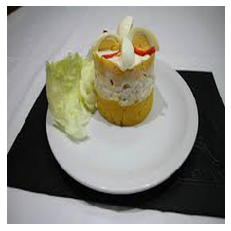

[1 0 0]


In [27]:
num_test = 12
plt.imshow(test_data[num_test][0]/255)
plt.axis('off')
plt.show()
print(test_data[num_test][1])

In [28]:
test = test_data[num_test][0].reshape(-1, IMG_SIZE, IMG_SIZE, 3)
result = cnn.predict(test)
if np.argmax(result) == 0:
  print("causa_rellena")
elif np.argmax(result) == 1:
  print("ceviche")
else:
  print("pollo_a_la_brasa")

causa_rellena
